In [2]:
import numpy as np
from typing import * 
import matplotlib.pyplot as plt
from numpy import pi, sin

alpha = 1
beta = 1

u_0 = 0
u_1 = 0

h = 0.1
m = 10

In [237]:
def plot(x: np.ndarray, u_k: np.ndarray, u_x: np.ndarray) -> None:
    """
    Args:
        x (np.ndarray): valores do domínio
        u_k (np.ndarray): valores calculados pelo método das diferenças finitas
        u_x (np.ndarray): valores reais da função nos pontos do domínio
    """
    plt.scatter(x, u_x, label="u(x)")
    plt.scatter(x, u_k, label="u_k")
    plt.legend()

    plt.show()

### Diferenças Finitas

In [238]:
def finite_difference(alpha: float, 
                      beta: float, 
                      f: Callable,
                      range: List,
                      u_0: float, 
                      u_1: float,
                      h: float) -> np.ndarray:
    """
    Args:
        alpha (float): parâmetro alpha das equações
        beta (float): parâmetro beta das equações
        f (Callable): função f das equações
        range (List): domínio do problema
        u_0 (float): valor u_0 de contorno (no ponto 0)
        u_1 (float): valor u_1 de contorno (no ponto 1)
        h (float): tamanho do passo

    Returns:
        np.ndarray: _description_
    """
    x = np.arange(range[0] + h, range[1], h)
    n = len(x)
        
    diagonal = (2*alpha + beta*h**2) / h**2 * np.ones(n)
    lower_diagonal = -alpha/h**2 * np.ones(n-1)
    upper_diagonal = -alpha /h**2 * np.ones(n-1)
    
    A = np.diag(diagonal)
    A += np.diag(upper_diagonal, k=1)
    A += np.diag(lower_diagonal, k=-1)

    b = f(x)
    
    return x, np.linalg.solve(A, b)


def error(u: np.ndarray, u_k: np.ndarray):
    return np.linalg.norm(u - u_k) / np.linalg.norm(u)

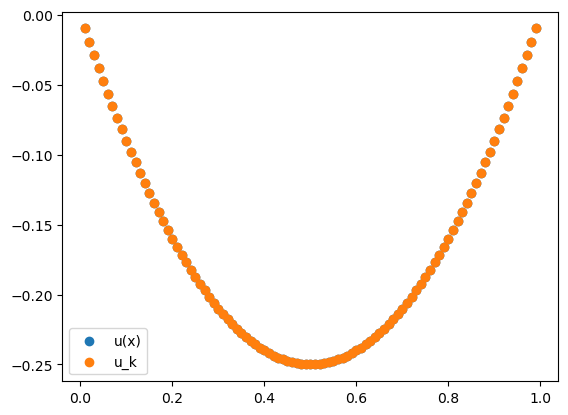

Erro: 1.2302275752332066e-14


In [239]:
example_1 = dict(
    alpha = 1, 
    beta = 1, 
    f = lambda x: -2*alpha + beta*x*(x-1),
    range = [0, 1],
    u_0 = 0,
    u_1 = 0,
    h = 0.01
)

def u(x):
    return x*(x-1)

x, u_k = finite_difference(**example_1)
u_x = u(x)
relative_error = error(u(x), u_k)


plot(x, u_k, u_x)
print(f"Erro: {relative_error}")

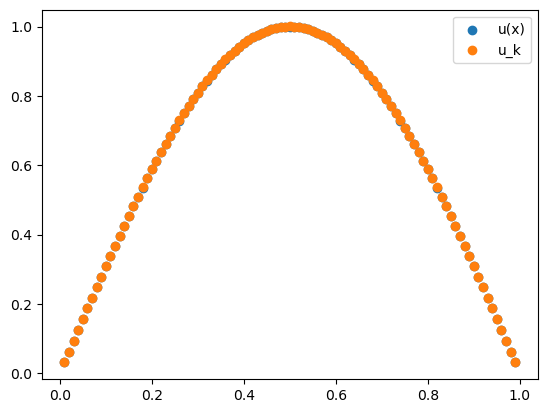

Erro: 7.468315422558122e-05


In [240]:
example_2 = dict(
    alpha = 1, 
    beta = 1, 
    f = lambda x: alpha*pi**2*sin(pi*x) + beta*sin(pi*x),
    range = [0, 1],
    u_0 = 0,
    u_1 = 0,
    h = 0.01
)

def u(x):
    return sin(pi*x)

x, u_k = finite_difference(**example_2)
u_x = u(x)
relative_error = error(u(x), u_k)


plot(x, u_k, u_x)
print(f"Erro: {relative_error}")

### Método de Galerkin

In [ ]:
def finite_difference(alpha: float, 
                      beta: float, 
                      f: Callable,
                      range: List,
                      u_0: float, 
                      u_1: float,
                      h: float) -> np.ndarray:
    """
    Args:
        alpha (float): parâmetro alpha das equações
        beta (float): parâmetro beta das equações
        f (Callable): função f das equações
        range (List): domínio do problema
        u_0 (float): valor u_0 de contorno (no ponto 0)
        u_1 (float): valor u_1 de contorno (no ponto 1)
        h (float): tamanho do passo

    Returns:
        np.ndarray: _description_
    """
    x = np.arange(range[0] + h, range[1], h)
    n = len(x)
        
    diagonal = (2*alpha + beta*h**2) / h**2 * np.ones(n)
    lower_diagonal = -alpha/h**2 * np.ones(n-1)
    upper_diagonal = -alpha /h**2 * np.ones(n-1)
    
    A = np.diag(diagonal)
    A += np.diag(upper_diagonal, k=1)
    A += np.diag(lower_diagonal, k=-1)

    b = f(x)
    
    return x, np.linalg.solve(A, b)

In [ ]:
def galerkin(alpha: float,
             beta: float, 
             range: List,
             h: float) -> np.ndarray:
    x = np.arange(range[0] + h, range[1], h)
    n = len(x)
    
    diagonal = (alpha*(1/h + 1/h**2) + beta*(h/3 + h/3)) * np.ones(n)
    lower_diagonal = -alpha/h + beta*h/6
    upper_diagonal = -alpha/h + beta*h/6
    
    A = np.diag(diagonal)
    A += np.diag(upper_diagonal, k=1)
    A += np.diag(lower_diagonal, k=-1)